# Problem Statement

**Business Use Case**

There has been a revenue decline for the Portuguese bank and they would like to know what actions to take. After investigation, we found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing effort on such clients.

**Data Science Problem Statement**

Predict if the client will subscribe to a term deposit based on a marketing campaign

**Evaluation Metric**

We will be using [roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) for evaluation.

**Objective of this template notebook**

The main objective of this template is to take you through the workflow that you may follow during the hackathon. We will be writing modular code in form of functions, the major advantages of this are

- Functions are reusable and at a later stage, the same task can be performed again by just importing the function without explicitly having to write the same piece of code again. 
- This can save a good amount of time not only at hackathons but also at work places.
- So make sure you assemble all your lines of code within a function.

**Word of caution**

This template is just an example of a data pipeline, every data science problem is unique and there are multiple ways to tackle them. Go through this template and try to leverage the information in this while solving your hackathon problems but you may not be able to use all the functions created here.

# Understanding the dataset

**Data Set Information**

The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.
There are four datasets:
bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with fewer inputs).
bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with fewer inputs). The smallest datasets are provided to test more computationally demanding machine learning algorithms 
Goal:- The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

**Features**

|Feature|Feature_Type|Description|
|-----|-----|-----|
|age|numeric|age of a person|  
|job |Categorigol,nominal|type of job ('admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')|  
|marital|categorical,nominal|marital status ('divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)|  
|education|categorical,nominal| ('basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown') | 
|default|categorical,nominal| has credit in default? ('no','yes','unknown')|  
|housing|categorical,nominal| has housing loan? ('no','yes','unknown')|  
|loan|categorical,nominal| has personal loan? ('no','yes','unknown')|  
|contact|categorical,nominal| contact communication type ('cellular','telephone')|  
|month|categorical,ordinal| last contact month of year ('jan', 'feb', 'mar', ..., 'nov', 'dec')| 
|day_of_week|categorical,ordinal| last contact day of the week ('mon','tue','wed','thu','fri')|  
|duration|numeric| last contact duration, in seconds . Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no')|
|campaign|numeric|number of contacts performed during this campaign and for this client (includes last contact)|  
|pdays|numeric| number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)|  
|previous|numeric| number of contacts performed before this campaign and for this client|  
|poutcome|categorical,nominal| outcome of the previous marketing campaign ('failure','nonexistent','success')|  
|emp.var.rate|numeric|employment variation rate - quarterly indicator|  
|cons.price.idx|numeric| consumer price index - monthly indicator|  
|cons.conf.idx|numeric| consumer confidence index - monthly indicator|  
|euribor3m|numeric|euribor 3 month rate - daily indicator|
|nr.employed|numeric| number of employees - quarterly indicator|   

**Output variable (desired target):**  

|Feature|Feature_Type|Description|
|-----|-----|-----|
|y | binary| has the client subscribed a term deposit? ('yes','no')|

# Exploratory Data Analysis & Data Pre Processing

###  Prepare data for Consumption
We will be doing Data Preprocessing

###  Importing necessary libraries

The following code is written in Python 3.x. Libraries provide pre-written functionality to perform necessary tasks.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Loading Data Modelling Libraries

We will use the popular scikit-learn library to develop our machine learning algorithms. In sklearn, algorithms are called Estimators and implemented in their own classes. For data visualization, we will use the matplotlib and seaborn library. Below are common classes to load.

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE

### Task - 1 : Load and Prepare dataset
- Load the dataframe using pandas. 
- Seperate the features from the target and store them in seperate variables. 

In [3]:

# Load the dataframe
bank_df=pd.read_csv('data/bank_data.csv',sep=';')

# Seperate the features and target
y = bank_df.iloc[:,-1]
bank_df.drop("y",axis=1, inplace=True)

bank_df.head()

# Code ends here.

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


### Task - 2: Check Numeric and Categorical Features

If you are familiar with machine learning, you will probably have encountered categorical features in many datasets. These generally include different categories or levels associated with the observation, which are non-numerical and thus need to be converted so the computer can process them.

- The given dataset contains both continuous and categorical features.
- Write two functions - one that will return column names of only the continuous variables and the other which will return all the categorical features in the dataset.

In [4]:
# Function to identify numeric features
def numeric_features(dataset):
    numeric_col = dataset.select_dtypes(include=['number']).columns
    return numeric_col


numeric_columns = numeric_features(bank_df)
print("Numeric Features:")
print(numeric_columns)
print("===="*20)

# Function to identify categorical features
def categorical_features(dataset):
    categorical_col = dataset.select_dtypes(exclude=['number']).columns
    return categorical_col

categorical_columns = categorical_features(bank_df)
print("Categorical Features:")
print(categorical_columns)

Numeric Features:
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')
Categorical Features:
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')


### Task - 3: Check Missing Data 

One of the main steps in data preprocessing is handling missing data. By now you should be having familiarity dealing with missing values. 

- Write a function that calculates the total missing values and the percentage of missing values in every feature of the dataset
- The above function should ideally return a dataframe consisting of the feature names as index and two columns having the count and percentage of missing values in that feature.

In [5]:
# Function to identify the number of missing values in every feature
def missing_datas(dataset):
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
    
    
missing_data = missing_datas(bank_df)
print(missing_data)

                Total  Percent
nr.employed         0      0.0
euribor3m           0      0.0
job                 0      0.0
marital             0      0.0
education           0      0.0
default             0      0.0
housing             0      0.0
loan                0      0.0
contact             0      0.0
month               0      0.0
day_of_week         0      0.0
duration            0      0.0
campaign            0      0.0
pdays               0      0.0
previous            0      0.0
poutcome            0      0.0
emp.var.rate        0      0.0
cons.price.idx      0      0.0
cons.conf.idx       0      0.0
age                 0      0.0


### Task - 4: Dropping missing values

Depending on the case we can allow a sepcific proportion of missing values, beyond which we might want to drop the variable from analysis.

This varies from case to case and the amount of information you think the variable has. For example, if you are working on some dataset which contains a column for date of marriage. It may be blank for 50% (or even more) of the population, but might have very high information about the lifestyle of the person. In such cases, you would still use the variable.

If the information contained in the variable is not that high, you can drop the variable if it has more than 50% missing values. There are projects / models where imputation of even 20 - 30% missing values provided better results - the famous Titanic dataset on Kaggle being one such case. Age is missing in ~20% of cases, but you benefit by imputing them rather than ignoring the variable.

- Now you have the number and percentage of missing values in every feature, from the previous function. 
- Using this information, you can decide as to what proportion of missing values you should remove from every feature.
- Write a function that takes a threshold value of your choice and removes the features having missing value percentage greater than this threshold. The function can take three parameters - the dataframe, missing data dataframe and threshold value.

In [6]:
# Function to drop missing values
def drop_missing(dataset, missing,value):
    dataset = dataset.drop((missing[missing['Percent'] > value]).index,axis= 1)
    print(dataset.isnull().sum().sort_values(ascending = False))
    return dataset 
    
bank_df=drop_missing(bank_df,missing_data,0.40)


nr.employed       0
euribor3m         0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
age               0
dtype: int64


### Task - 5 : Check for Class Imbalance
Lets check the class distribution of all the classes in the target. If an imbalance exists, we will deal with it by applying SMOTE in the later stages.

In [7]:
def class_imbalance(target):
    class_values = (target.value_counts()/target.value_counts().sum())*100
    return class_values

class_imbalance(y)

no     88.734583
yes    11.265417
Name: y, dtype: float64

The distribution 88:11 is a clear indication of imbalance in the classes. 

### Task - 6: Univariate analysis of Categorical columns

Visualizations always help to gain deeper insights into the data. Like for example, even if the missing values in all the categorical variables are zero, let's plot our data to know if the missing values have been represented in the form of some other special characters. 

###  Instructions:
- It can get a little tedious (and boring!) to write the same piece of code for analysing the frequency of categorical variables. So why not write a single function for it and just call it whenever required.
- Write a function that plots the frequency of the values of all the categorical variables. 
- After plotting, you will realise that the missing values in some columns have been represented as `unknown`

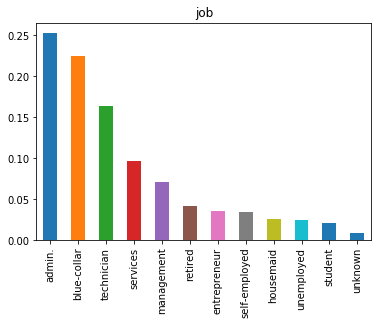

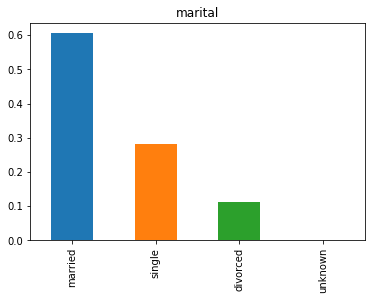

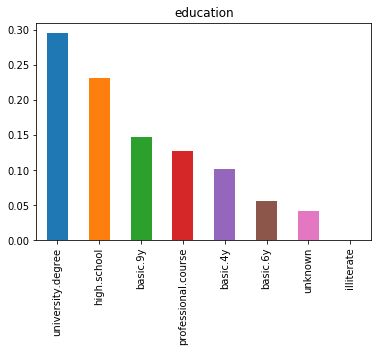

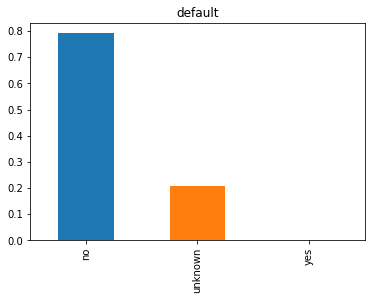

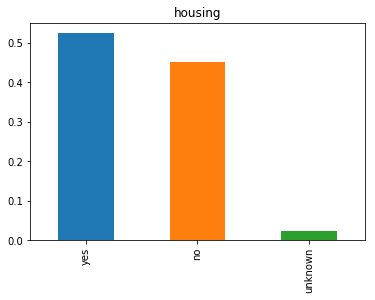

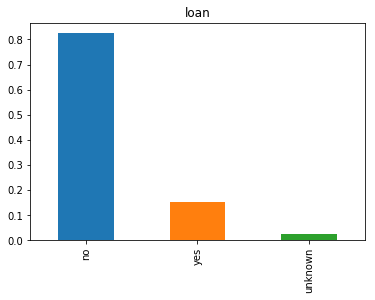

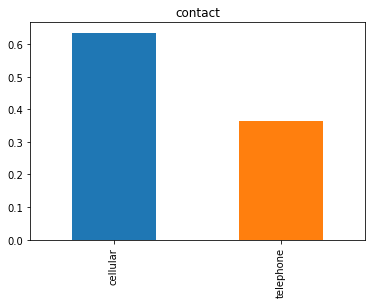

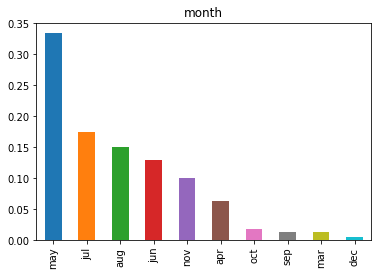

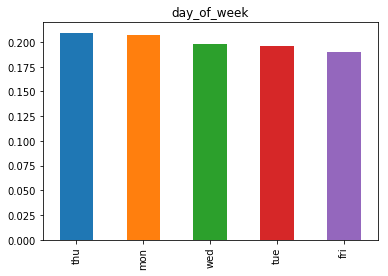

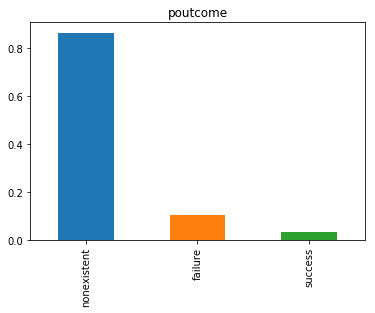

In [8]:
# Function to perform univariate analysis of categorical columns
def plot_categorical_columns(dataframe):
    categorical_columns = categorical_features(dataframe)
    dataframe = dataframe[categorical_columns]
    for i in dataframe:
        plt.title(i)
        dataframe[i].value_counts(normalize=True).plot(kind='bar')
        plt.show()

plot = plot_categorical_columns(bank_df)


### Task - 7: Imputing missing values of categorical columns 

In the previous task we have seen that there were no missing values in the dataset. But if you look at the plots in the previous task carefully, you will observe one value known as 'unknown'. 'unknwon' is a missing value and we should treat them. Let's impute them.

- Write a function that imputes the 'unknown' in the categorical columns with the mode value of the respective column 

In [9]:
# Impute mising values of categorical data with mode
def impute_mode(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.select_dtypes(exclude=np.number).columns:
            dataframe[col]=dataframe[col].str.replace('unknown',dataframe[col].mode()[0])
    return dataframe

bank_df = impute_mode(bank_df)



### Task -  8: Univariate analysis of Continuous columns
Just like for categorical columns, by performing a univariate analysis on the continuous columns, we can get a sense of the distrbution of values in every column and of the outliers in the data. Histograms are great for plotting the distribution of the data and boxplots are the best choice for visualizing outliers. 

- Construct two functions, one that plots a histogram of all the continuous features and other that plots a boxplot of the same.

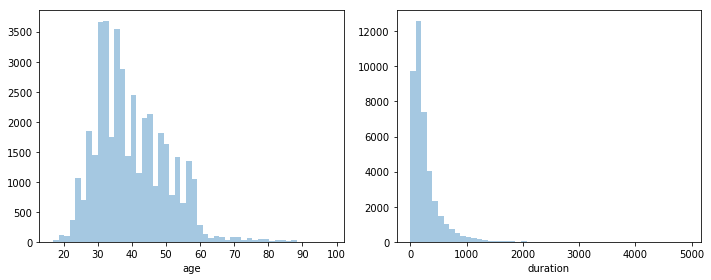

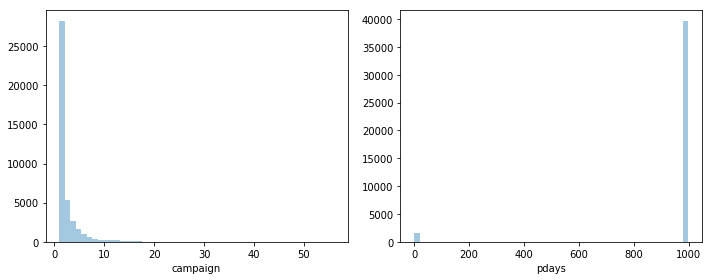

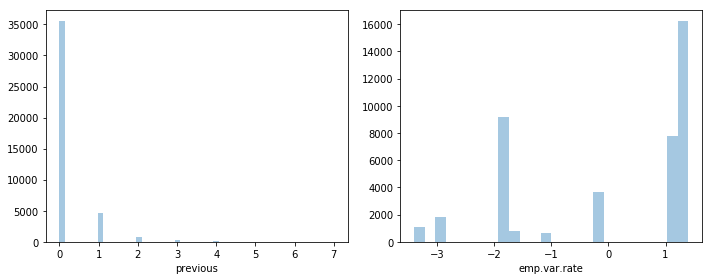

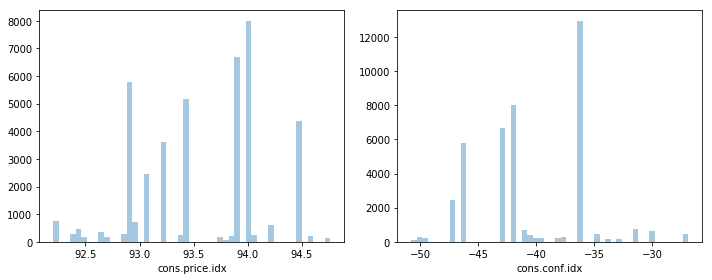

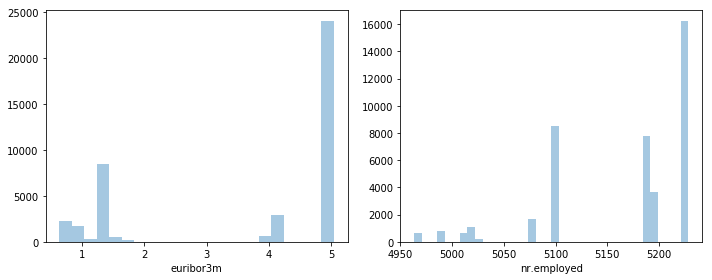

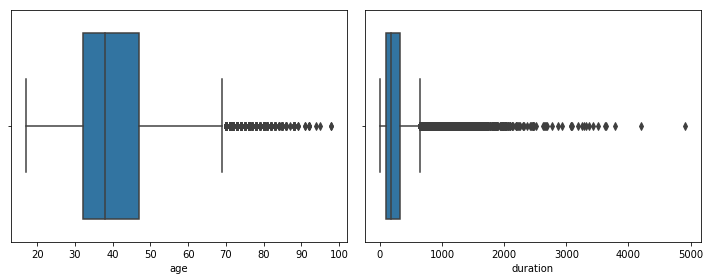

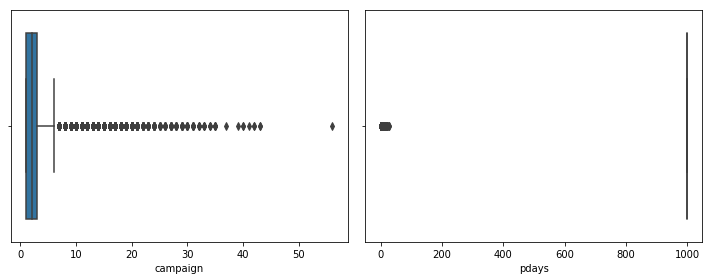

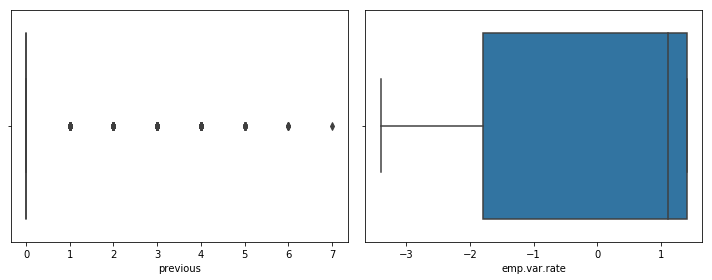

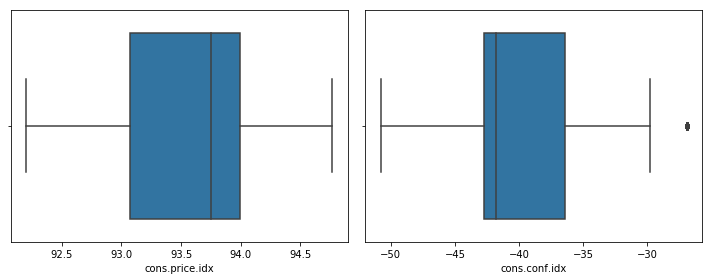

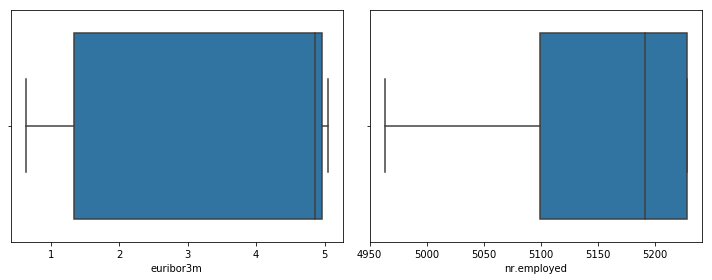

In [10]:
# Code Starts here

# Function to plot histograms
def plot_continuous_columns(dataframe):
    numeric_columns = numeric_features(dataframe)
    dataframe = dataframe[numeric_columns]
    
    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            sns.distplot(dataframe[numeric_columns[i]], kde=False)
            plt.subplot(122)            
            sns.distplot(dataframe[numeric_columns[i+1]], kde=False)
            plt.tight_layout()
            plt.show()

        else:
            sns.distplot(dataframe[numeric_columns[i]], kde=False)

# Function to plot boxplots
def plot_box_plots(dataframe):
    numeric_columns = numeric_features(dataframe)
    dataframe = dataframe[numeric_columns]
    
    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            sns.boxplot(dataframe[numeric_columns[i]])
            plt.subplot(122)            
            sns.boxplot(dataframe[numeric_columns[i+1]])
            plt.tight_layout()
            plt.show()

        else:
            sns.boxplot(dataframe[numeric_columns[i]])

plot_continuous_columns(bank_df)            
plot_box_plots(bank_df)

# Code ends here

### Task - 9 : Bivariate Analysis - Categorical Columns

In [11]:
def bivariate_analysis_categorical(dataframe,target):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.select_dtypes(exclude=np.number).columns:
            sns.countplot(x=dataframe[col],hue=target,data=dataframe)
            plt.xticks(rotation='vertical')
            plt.show()

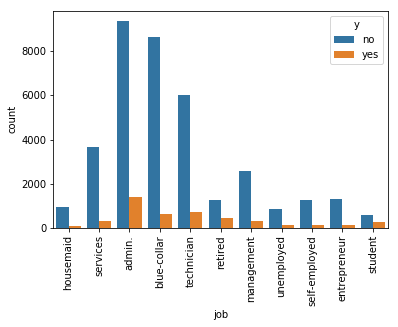

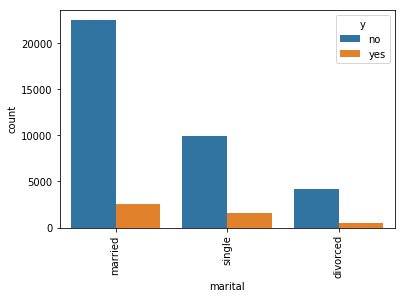

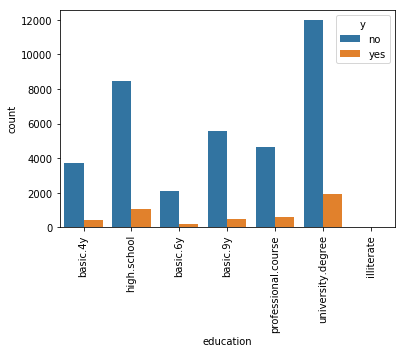

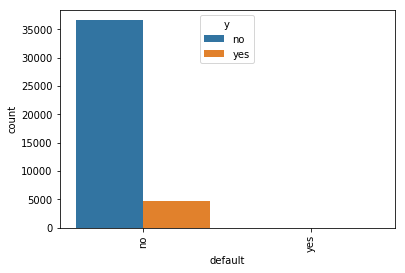

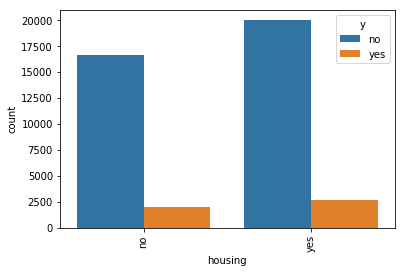

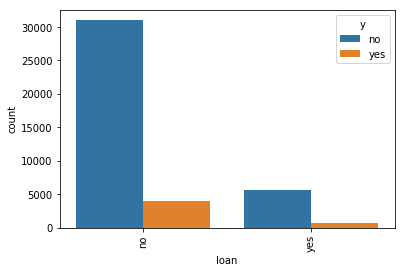

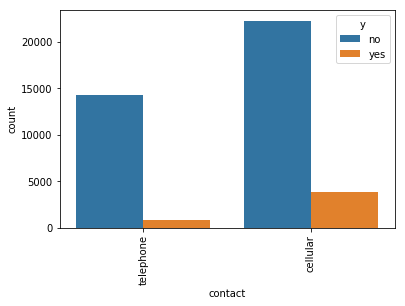

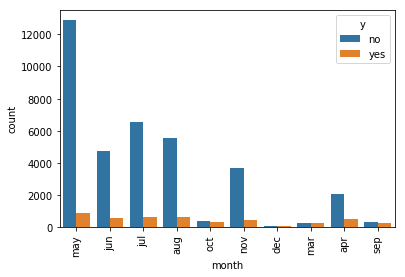

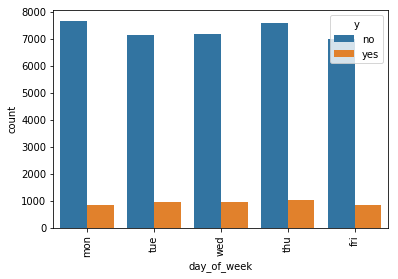

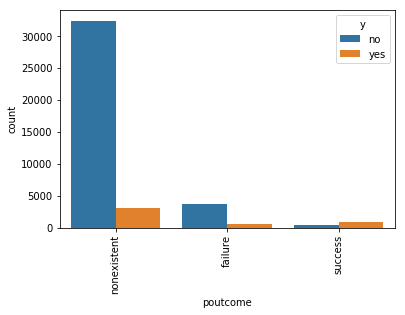

In [12]:
bivariate_analysis_categorical(bank_df,y)

### Task - 10: Fill null values in continuous features

There exists many approach to missing-data imputation and they usually depend on your problem and how your data algorithm behaves. If the features are numeric you can use simple approaches, such as average values and sampling from the feature distribution.

- Missing values in continuous data are mostly imputed using mean or median. What to choose depends on a lot of factors and is to be decided by you
- Let's write a function that will impute missing data with either mean or mode, depending on the user's choice.
    - For this, define a parameter that can take only two values 0 or 1.
    - If you specify 0 - make an imputation with mean 
    - If you specify 1 - make an imputation with median

In [13]:
# Code Starts here

# Function to impute missing values with mean or median
def fill_null_values(dataset, value):
    nulls = pd.DataFrame(dataset.isnull().sum().sort_values(ascending=False))
    nulls = nulls[nulls>0]
    nulls.columns = ['Null Count']
    nulls.index.name = 'Feature'
    nulls

    for column in nulls[nulls["Null Count"]> 0].index:
        if dataset[column].dtype == np.number and value == 0:
            dataset[column].fillna(dataset[column].mean(), inplace = True)
        elif value == 1:
            dataset[column].fillna(dataset[column].median(), inplace = True)
        else:
            dataset[column].fillna("NA", inplace = True)
    print(dataset.isnull().sum())
    return dataset

bank_df=fill_null_values(bank_df,0)

# Code Ends here

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64


### Task - 11: Detect outliers in the continuous columns
Visualisations have given us a good sense of the number of outliers in the data. In this task let's detect the number of outliers in every continuous feature.

- Write a function that will output the number of outliers in every numeric feature based on 1.5*IQR method


In [14]:
# Code starts here

# Function to detect outliers in every feature
def detect_outliers(dataframe):
    cols = list(dataframe)
    
    for column in cols:
        if column in dataframe.select_dtypes(include=np.number).columns:
            q1 = dataframe[column].quantile(0.25)
            q3 = dataframe[column].quantile(0.75)
            iqr = q3 - q1
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)

            print(column + ' ---------', dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0])

detect_outliers(bank_df)


# Code ends here

age --------- 469
duration --------- 2963
campaign --------- 2406
pdays --------- 1515
previous --------- 5625
emp.var.rate --------- 0
cons.price.idx --------- 0
cons.conf.idx --------- 447
euribor3m --------- 0
nr.employed --------- 0


### Task - 12: Treating outliers in the continuous columns
- Outliers can be treated in a variety of ways. It depends on the skewness of the feature.
- To reduce right skewness, take roots or logarithms or reciprocals (roots are weakest). This is the commonest problem in practice.
- To reduce left skewness, take squares or cubes or higher powers.
- Another method of treating outliers is to define a confidence interval of let's say 90% and then replace all the outliers below the 5th percentile with the value at 5th percentile and all the values above 95th percentile with the value at the 95th percentile. This method is called **Winsorization**. It is pretty useful when there are negative values and zeros in the features which cannot be treated with log transforms or square roots. Do read up on it more [here](https://www.statisticshowto.datasciencecentral.com/winsorize/)

- Write a function that treats all the outliers in the numeric features using winsorization.
- This function is quite 

In [15]:
# Function to treat outliers 
def treat_outliers(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.select_dtypes(include=np.number).columns:
            dataframe[col] = winsorize(dataframe[col], limits=[0.05, 0.1],inclusive=(True, True))
    
    return dataframe    


bank_df = treat_outliers(bank_df)
print(detect_outliers(bank_df))

age --------- 0
duration --------- 0
campaign --------- 0
pdays --------- 0
previous --------- 5625
emp.var.rate --------- 0
cons.price.idx --------- 0
cons.conf.idx --------- 0
euribor3m --------- 0
nr.employed --------- 0
None


### Task - 13: Function for finding Correlation between Features

A correlation heatmap uses colored cells, typically in a monochromatic scale, to show a 2D correlation matrix (table) between two discrete dimensions or event types. The color value of the cells is proportional to the number of measurements that match the dimensional values.


- Write a function that will plot a heatmap using seaborn to depict the pearson correlation of all the numeric features. Take our word you will be reusing this function over and over.

Highly Correlated Variables


cons.price.idx  emp.var.rate      0.765664
emp.var.rate    cons.price.idx    0.765664
nr.employed     emp.var.rate      0.931650
emp.var.rate    nr.employed       0.931650
euribor3m       nr.employed       0.958584
nr.employed     euribor3m         0.958584
emp.var.rate    euribor3m         0.975607
euribor3m       emp.var.rate      0.975607
dtype: float64

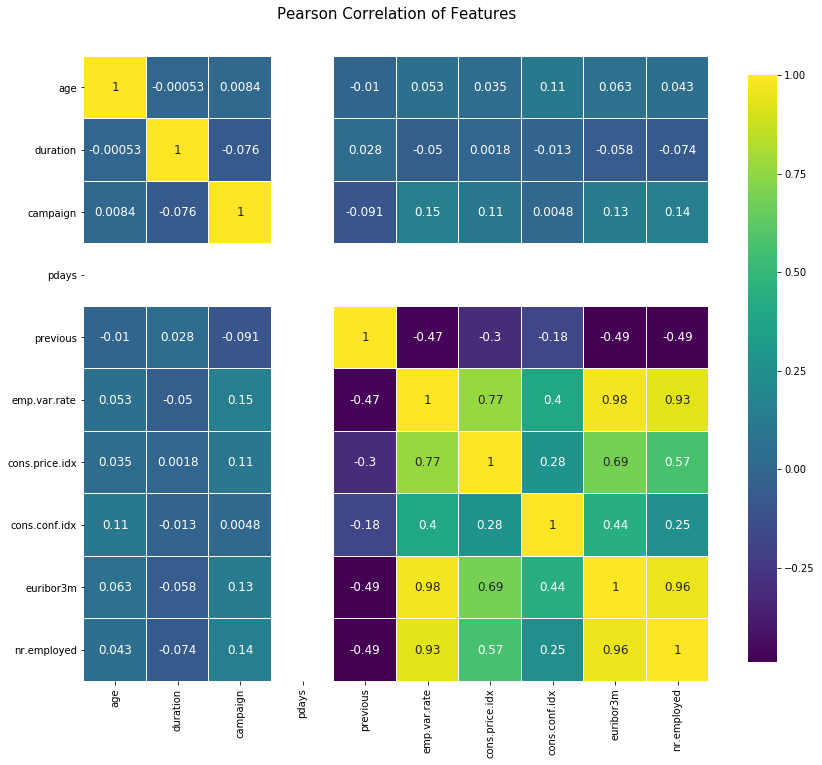

In [16]:
# Code Starts here

#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = 'viridis',
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    
    correlation = df.corr().unstack().sort_values(kind='quicksort')
    print('Highly Correlated Variables')
    return correlation[((correlation>=0.75) | (correlation<=-0.75)) & (correlation!=1)]

correlation_heatmap(bank_df)

# Code Ends Here

### Task - 14: Function to Label Encode Categorical variables

In machine learning projects, one important part is feature engineering. It is very common to see categorical features in a dataset. However, our machine learning algorithm can only read numerical values. It is essential to encoding categorical features into numerical values.

- Write a function that will perform label encoding on all the categorical features and also the target (if it is categorical) in the  dataset.

In [17]:
# Code Starts here

le = LabelEncoder()
# Function that auto encodes any dataframe column of type category or object.
def dummyEncode(dataset):
        
        columnsToEncode = list(dataset.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                dataset[feature] = le.fit_transform(dataset[feature])
            except:
                print('Error encoding '+feature)
        return dataset
bank_df = dummyEncode(bank_df)
y = pd.DataFrame(le.fit_transform(y))


# Code ends here

# Baseline Model and Feature Engineering

## Applying a baseline model

### Task - 1: Spliting into training and validation

When you’re working on a model and want to train it, you obviously have the dataset. But after training, we have to test the model on some test dataset. For this, you’ll require a dataset which is different from the training set you used earlier. But it might not always be possible to have so much data during the development phase. Hence what we do is split the available data into training and validation sets.

- Split the features and the target into training and validation set.

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(bank_df,y, test_size=0.3, random_state=5)

#### Baseline Logistic Model

There are many Classification algorithms are present in machine learning, which are used for different classification applications. Some of the main classification algorithms are as follows-
- Logistic Regression
- DecisionTree Classifier
- RandomForest Classfier
- XGBClassifier
- GradientBoostingClassifier

Instructions
- Write a function that takes the training and validation sets and fits a model on the training set, makes a prediction and outputs an auc score.
- Then fit a vanilla logistic regression model by calling the above function.

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     10908
           1       0.64      0.37      0.47      1449

   micro avg       0.90      0.90      0.90     12357
   macro avg       0.78      0.67      0.71     12357
weighted avg       0.89      0.90      0.89     12357

ROC_AUC_SCORE is 0.6716863456531988


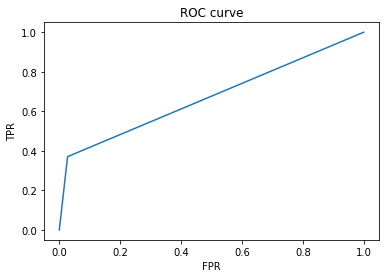

AUC Score = 67.17 %
On Model - 
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     10908
           1       0.50      0.47      0.48      1449

   micro avg       0.88      0.88      0.88     12357
   macro avg       0.71      0.71      0.71     12357
weighted avg       0.88      0.88      0.88     12357

ROC_AUC_SCORE is 0.7051110131717105


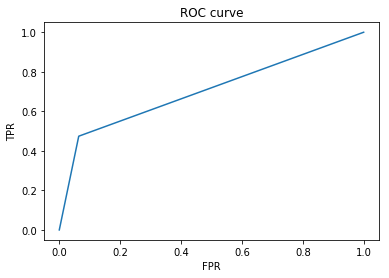

AUC Score = 70.51 %
On Model - 
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     10908
           1       0.61      0.40      0.48      1449

   micro avg       0.90      0.90      0.90     12357
   macro avg       0.76      0.68      0.71     12357
weighted avg       0.89      0.90      0.89     12357

ROC_AUC_SCORE is 0.6846983352579564


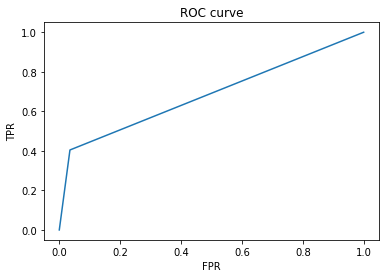

AUC Score = 68.47 %
On Model - 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10908
           1       0.69      0.39      0.50      1449

   micro avg       0.91      0.91      0.91     12357
   macro avg       0.81      0.68      0.72     12357
weighted avg       0.90      0.91      0.90     12357

ROC_AUC_SCORE is 0.6819389495885406


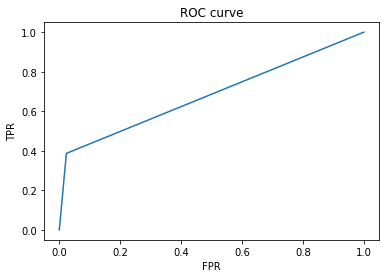

AUC Score = 68.19 %
On Model - 
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10908
           1       0.68      0.43      0.53      1449

   micro avg       0.91      0.91      0.91     12357
   macro avg       0.80      0.70      0.74     12357
weighted avg       0.90      0.91      0.90     12357

ROC_AUC_SCORE is 0.7015911736101147


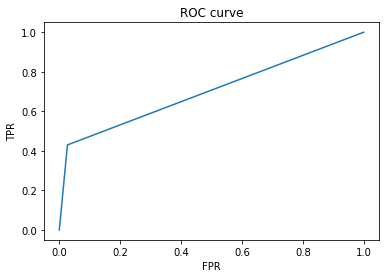

AUC Score = 70.16 %
On Model - 
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)


In [30]:
def run_model(xtrain, xval, ytrain, yval, model):
    '''
    Performs model training and tests using ROC-AUC 
    returns AUC score
    '''
    model.fit(xtrain, ytrain)
    y_scores = model.predict(xval)
    auc = roc_auc_score(yval, y_scores)
    print(classification_report(y_val,y_scores))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
    print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
    
    #fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    return auc

models = [LogisticRegression,DecisionTreeClassifier, RandomForestClassifier,XGBClassifier,GradientBoostingClassifier]
for model in models:
    # run model
    model = model()
    auc = run_model(X_train, X_val, y_train, y_val, model) # train and returns AUC test score
    print('AUC Score = %.2f' %(auc*100) +' %\nOn Model - \n'+str(model))
    print('===='*20)

## Feature Selection

### Task - 1: Identify highly correlated features and drop them

The function correlation heatmap has given the correlation between the categorical features. Let us use this information to drop some of the heavily correlated features. Any two features having correlation higher than 0.75 or lesser than -0.75 are said to be heavily correlated.

- Write a function takes the threshold value as a parameter and drops the features having a correlation value greater than this threshold. 

In [20]:
def highly_corr(dataset,value):
    # Create correlation matrix
    corr_matrix = dataset.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Find index of feature columns with correlation greater than threshold value.
    to_drop = [column for column in upper.columns if any(upper[column] > value)]
    print(to_drop)
    return(to_drop)

# Threshold selected is 0.95
to_drop=highly_corr(bank_df,0.95) 

def drop_corr(dataset,to_drop):
    # Drop features 
    dataset.drop(to_drop, axis=1,inplace= True)
    return dataset.columns
drop_corr(bank_df,to_drop)

['euribor3m', 'nr.employed']


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx'],
      dtype='object')

###  Task - 2 : Using RFE for feature selection
In this task let'use Recursive Feature Elimination for selecting the best features. RFE is a wrapper method that uses the model to identify the best features. 

- The function below takes the number of features as a parameter and uses RFE for each of the specific models - LogisticRegression,DecisionTreeClassifier,RandomForestClassifier and outputs the best features for each model.


In [21]:
# Code Starts here

def feature_selection(dataframe,target,number_of_features,model):
    X = dataframe
    y = target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    models = model()
    rfe = RFE(models,number_of_features)
    rfe = rfe.fit(X, y)
    print('Features  to be selected for {}'.format(str(models)))
    features = pd.Series(rfe.ranking_, index=X.columns)
    print(features[features.values==1].index.tolist())
    print('===='*30)

# Choosing the models
models = [LogisticRegression,DecisionTreeClassifier,RandomForestClassifier]

# Selecting 8 number of features
for i in models:
    feature_selection(bank_df,y,8,i)
    
# Code ends here

Features  to be selected for LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
['marital', 'contact', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx']
Features  to be selected for DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
['age', 'job', 'day_of_week', 'duration', 'campaign', 'poutcome', 'emp.var.rate', 'cons.price.idx']
Features  to be selected for RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_

# Grid-Search & Hyperparameter Tuning 

### Task - 1 : Grid Search for Random Forest

We perform a Grid Search for Random Forest to find out the best parameters.

In [22]:
def grid_search_random_forrest(dataframe,target):
    X = dataframe
    y = target
    

    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)
    rfc = RandomForestClassifier()
    param_grid = { 
#     'n_estimators': [11],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
    }
    grid_search_model = GridSearchCV(rfc, param_grid=param_grid)
    grid_search_model.fit(X_train, y_train)
    
    return grid_search_model.best_params_

print('Best Parameters are:')
grid_search_random_forrest(bank_df,y)

Best Parameters are:


{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto'}

### Task - 2 : Applying the best parameters obtained using Grid Search on Random Forest model

In the task below, we fit a random forest model using the best parameters obtained using Grid Search. The target is imbalanced. Hence we apply Synthetic Minority Oversampling (SMOTE) for undersampling and oversampling the majority and minority classes in the target respectively. 

Do not apply SMOTE if there is no imbalance in the target.

You can try experimenting with and without SMOTE and check for the difference in recall. 

ROC_AUC_SCORE is 0.9248730895430342
              precision    recall  f1-score   support

           0       0.97      0.88      0.92     11005
           1       0.89      0.97      0.93     10924

   micro avg       0.92      0.92      0.92     21929
   macro avg       0.93      0.92      0.92     21929
weighted avg       0.93      0.92      0.92     21929



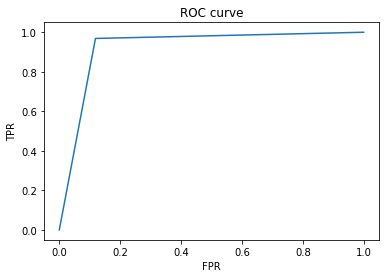

In [23]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE


def grid_search_random_forrest_best(dataframe,target):
    X = dataframe
    y = target
    
    # Applying Smote for dealing with class imbalance
    smote = SMOTE(kind='regular')
    X_sm, y_sm =  smote.fit_sample(X, y)
    
    X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=42)
    
    rfc = RandomForestClassifier(n_estimators=11, max_features='auto', max_depth=8, criterion='entropy')
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    
    print('ROC_AUC_SCORE is',roc_auc_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    #fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    plt.clf()
    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()

# Applying the best paramaters on the best features obtained using RFE
grid_search_random_forrest_best(bank_df[['age', 'job', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome', 'emp.var.rate']],y)

### Task - 3 : Grid Search using Logistic Regression

ROC_AUC_SCORE is  0.7239710163034645
              precision    recall  f1-score   support

           0       0.70      0.79      0.74     11005
           1       0.75      0.66      0.71     10924

   micro avg       0.72      0.72      0.72     21929
   macro avg       0.73      0.72      0.72     21929
weighted avg       0.73      0.72      0.72     21929



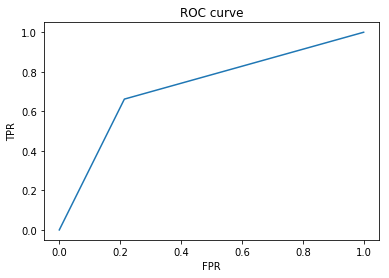

In [24]:
def grid_search_log_reg(dataframe,target):
    X = dataframe
    y = target
    
    smote = SMOTE(kind='regular')
    X_sm, y_sm =  smote.fit_sample(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=42)
    log_reg = LogisticRegression()
    
    param_grid = { 
        'C' : np.logspace(-5, 8, 15)
    }
    grid_search = GridSearchCV(log_reg, param_grid=param_grid)
    
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    
    print('ROC_AUC_SCORE is ',roc_auc_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    plt.clf()
    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()

grid_search_log_reg(bank_df[['marital', 'contact', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx']],y)

### Task - 4 : Applying XGBoost model

Accuracy is  0.9351543618040038
              precision    recall  f1-score   support

           0       0.96      0.91      0.93     11005
           1       0.91      0.96      0.94     10924

   micro avg       0.94      0.94      0.94     21929
   macro avg       0.94      0.94      0.94     21929
weighted avg       0.94      0.94      0.94     21929

ROC_AUC_SCORE is  0.9352589224531108
[[ 9981  1024]
 [  398 10526]]


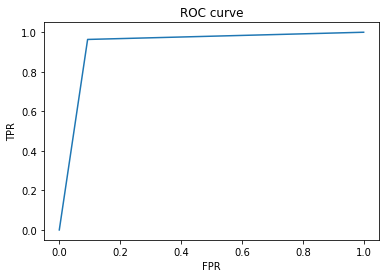

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
       n_estimators=50, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [31]:

def xgboost(dataframe,target):
    X = dataframe
    y = target
    
    smote = SMOTE(kind='regular')
    X_sm, y_sm =  smote.fit_sample(X, y)
    
    X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=42)
    model = XGBClassifier(n_estimators=50, max_depth=4)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Accuracy is ',model.score(X_test, y_test))
    print(classification_report(y_test, y_pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
#     print(auc(false_positive_rate, true_positive_rate))
    
    print('ROC_AUC_SCORE is ', roc_auc_score(y_test, y_pred))
    plt.clf()
    plt.plot(false_positive_rate, true_positive_rate)
    print(confusion_matrix(y_test,y_pred))
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    return model

xgboost(bank_df,y)

# Ensembling

AUC_ROC_SCORE is  0.9134227085621178
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     11005
           1       0.95      0.87      0.91     10924

   micro avg       0.91      0.91      0.91     21929
   macro avg       0.92      0.91      0.91     21929
weighted avg       0.92      0.91      0.91     21929

[[10535   470]
 [ 1425  9499]]


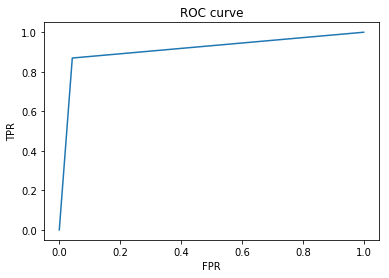

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import VotingClassifier


def ensemble_func2(dataframe,target):
    X = dataframe
    y = target
    
    smote = SMOTE(kind='regular')
    X_sm, y_sm =  smote.fit_sample(X, y)
    
    X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=42)

    model1 = RandomForestClassifier()
    
    model2 = LogisticRegression()
    
    model = VotingClassifier(estimators=[('rf', model1), ('lr', model2)], voting='hard')
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    model.score(X_test,y_test)

        
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)

    print('AUC_ROC_SCORE is ',roc_auc_score(y_test, y_pred))
    
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    
    plt.clf()
    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    
ensemble_func2(bank_df,y)